In [87]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 1. CSV 파일에 접근

In [88]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
arbiter_norm_info_train

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,0.694372,-0.002307,20.434258,0.694372,0.000274,0.019442,-0.002287,...,0.015868,0.007617,0.000015,0.000046,2.344834,-0.000040,14.412805,0.001723,-0.000005,3.566285e-05
1,0,train,1,0.691446,-0.002006,20.991413,0.691446,0.000273,0.014744,-0.002267,...,0.032499,0.015419,0.000059,0.000046,2.345386,-0.000031,14.412802,0.001723,-0.000005,2.152364e-05
2,0,train,2,0.690258,-0.002156,21.076933,0.690258,0.000271,0.017136,-0.002245,...,0.049771,0.023248,0.000135,0.000045,2.340322,-0.000052,14.412816,0.001723,-0.000004,5.877954e-05
3,0,train,3,0.683703,-0.000564,21.081352,0.683704,0.000270,0.001176,-0.002240,...,0.066361,0.030590,0.000234,0.000045,2.336994,-0.000033,14.412849,0.001723,-0.000004,2.390627e-05
4,0,train,4,0.669330,-0.000848,20.610689,0.669330,0.000259,0.002783,-0.002231,...,0.079625,0.036847,0.000339,0.000045,2.335012,-0.000042,14.412910,0.001723,-0.000003,3.988793e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,49999,train,0,0.221659,0.000945,5.820252,0.221659,0.000028,0.032387,-0.006480,...,0.148455,0.073704,0.000448,4.317862,721.564453,-0.007840,76.601448,0.047833,-0.028808,1.423677e-05
796996,49999,train,1,0.394497,-0.001642,8.958154,0.394497,0.000087,0.030854,-0.006463,...,0.148455,0.073704,0.000448,3.943173,689.543579,-0.004655,77.133347,0.048514,-0.028761,5.494147e-06
796997,49999,train,2,0.535218,-0.001537,12.590945,0.535218,0.000164,0.014449,-0.006448,...,0.148455,0.073704,0.000448,3.727469,670.419556,-0.005871,78.015923,0.049653,-0.028702,9.246055e-06
796998,49999,train,3,0.741654,-0.001654,18.265005,0.741654,0.000316,0.008663,-0.006431,...,0.148455,0.073704,0.000448,3.466171,646.491272,0.000461,77.765388,0.049329,-0.028707,6.118805e-08


# 2. MAML과 Arbiter의 Step 별 정보

In [90]:
# maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
# arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step').mean()
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step').mean()

In [91]:
maml_per_inner_loop_step

,current_iter,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,36559.5,0.003659,289.812669,11.491116,0.081629,0.037481,-0.003774,269.782125,8.215406,0.042902,...,1.072792,0.507207,0.077683,0.013045,39.182849,0.000330,62.529119,0.036257,-0.019916,0.000061
1,36559.5,-0.001982,107.935772,4.193416,0.011124,0.038461,-0.003755,269.790618,8.215524,0.042903,...,1.061401,0.501794,0.076345,0.010767,35.422958,0.000048,62.529126,0.036257,-0.019917,0.000013
2,36559.5,-0.005491,88.065963,3.414103,0.007365,0.042648,-0.003700,269.792778,8.215622,0.042904,...,1.055557,0.499415,0.075469,0.006483,27.281704,-0.000111,62.529456,0.036257,-0.019915,0.000018
3,36559.5,0.000404,38.556051,1.435521,0.001305,0.034454,-0.003704,269.794152,8.215638,0.042904,...,1.058257,0.500584,0.075823,0.000869,9.501700,0.000002,62.529522,0.036257,-0.019915,0.000021
4,36559.5,0.000122,14.682678,0.549960,0.000229,0.032653,-0.003705,269.794445,8.215642,0.042904,...,1.058344,0.500593,0.075839,0.000090,2.730383,-0.000005,62.529582,0.036258,-0.019915,0.000035


In [92]:
arbiter_per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.635725,0.000001,15.247446,0.635725,0.000308,0.038154,-0.003279,226.684584,6.763130,0.028824,...,0.102503,0.056165,0.000540,0.981467,280.943890,0.000270,51.808677,0.024343,-0.021750,0.000035
1,0.695344,0.000522,16.134870,0.695344,0.000364,0.033130,-0.003285,226.685764,6.763135,0.028824,...,0.102544,0.056186,0.000540,0.929949,275.110784,-0.009558,51.919288,0.024468,-0.021654,0.000638
2,0.713645,0.000411,17.436583,0.713645,0.000387,0.025013,-0.003289,226.687144,6.763140,0.028824,...,0.102606,0.056217,0.000541,0.914248,273.353903,-0.010142,52.052716,0.024617,-0.021553,0.000871
3,0.724560,0.000462,18.060736,0.724560,0.000399,0.025910,-0.003293,226.688301,6.763145,0.028824,...,0.102677,0.056253,0.000541,0.905003,272.398303,-0.009552,52.206705,0.024787,-0.021458,0.000890
4,0.734203,0.000381,18.120058,0.734203,0.000408,0.030161,-0.003297,226.689567,6.763150,0.028824,...,0.102750,0.056290,0.000542,0.898586,271.788684,-0.009624,52.379156,0.024975,-0.021361,0.001013


# 3. MAML과 Arbiter의 Iteration 별 정보

In [93]:
maml_norm_info_train=maml_norm_info_train[maml_norm_info_train['current_iter'] < 50001]

#maml_norm_info_train=maml_norm_info_train[maml_norm_info_train['num_step'] == 4]

maml_gr = maml_norm_info_train.groupby('current_iter').mean()
arbiter_gr = arbiter_norm_info_train.groupby('current_iter').mean()

# 4. Column 정보

In [94]:
arbiter_gr.columns

Index(['num_step', 'layer_dict.conv0.conv.weight_alpha',
       'layer_dict.conv0.conv.weight_grad_mean',
       'layer_dict.conv0.conv.weight_grad_L1norm',
       'layer_dict.conv0.conv.weight_grad_L2norm',
       'layer_dict.conv0.conv.weight_grad_var',
       'layer_dict.conv0.conv.weight_gsnr',
       'layer_dict.conv0.conv.weight_weight_mean',
       'layer_dict.conv0.conv.weight_weight_L1norm',
       'layer_dict.conv0.conv.weight_weight_L2norm',
       ...
       'layer_dict.linear.bias_weight_L1norm',
       'layer_dict.linear.bias_weight_L2norm',
       'layer_dict.linear.bias_weight_var', 'all_grads_var',
       'all_grads_l2norm', 'all_grads_mean', 'all_weights_norm',
       'all_weights_var', 'all_weights_mean', 'gsnr'],
      dtype='object', length=108)

# 5. Gradient Variance

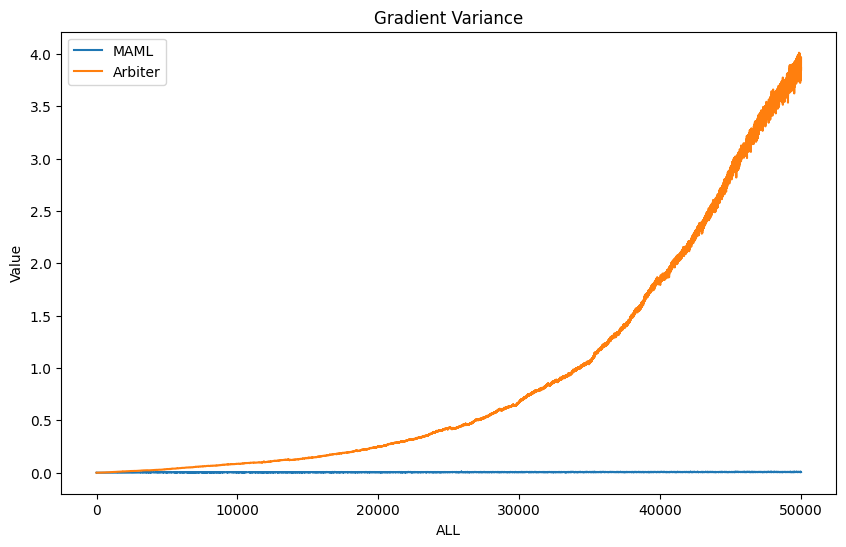

In [95]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_var'], label='MAML')
plt.plot(arbiter_gr['all_grads_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

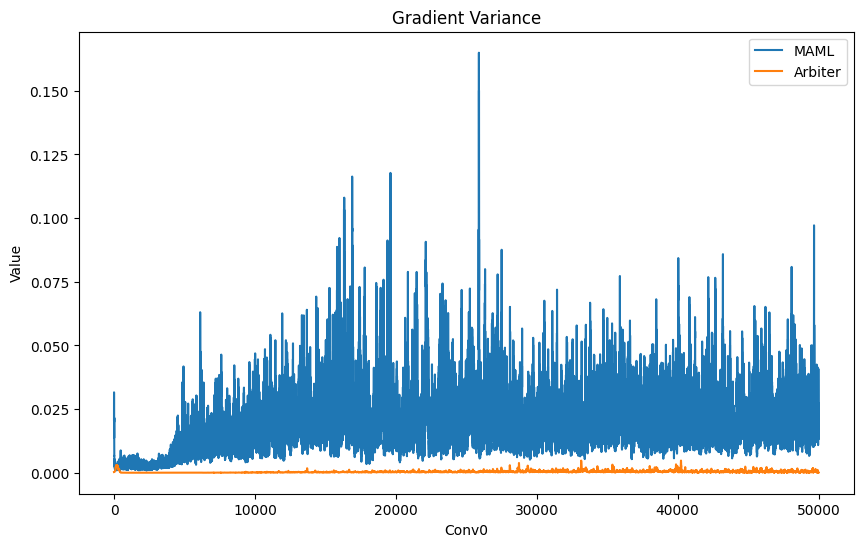

In [96]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

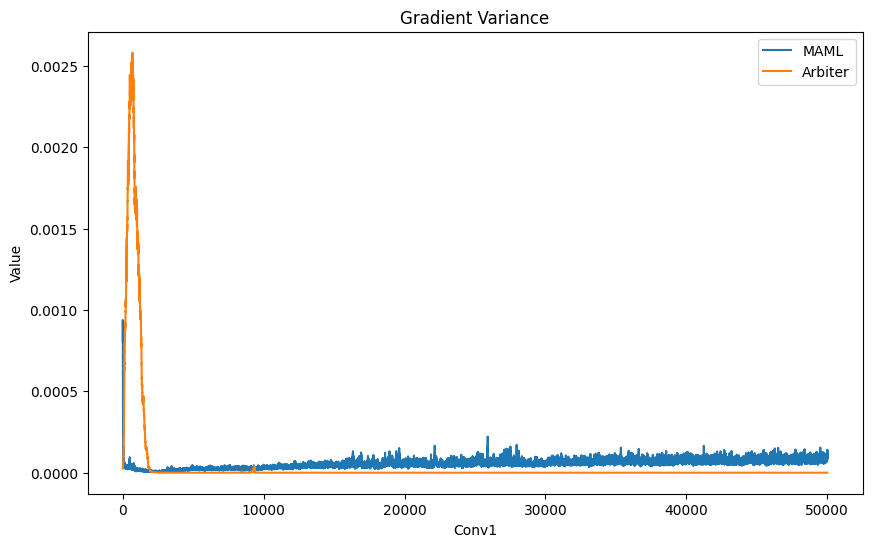

In [97]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

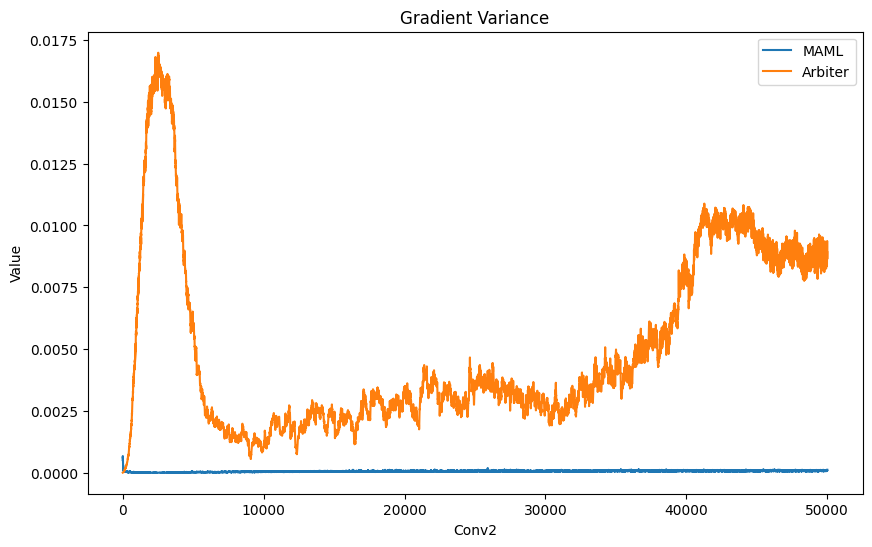

In [98]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

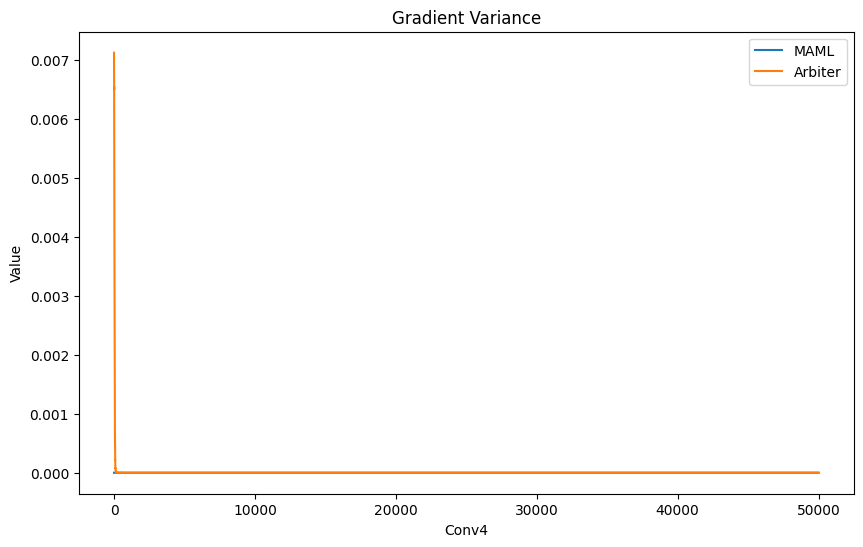

In [99]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.bias_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.bias_grad_var'],label='Arbiter')

plt.xlabel('Conv4')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

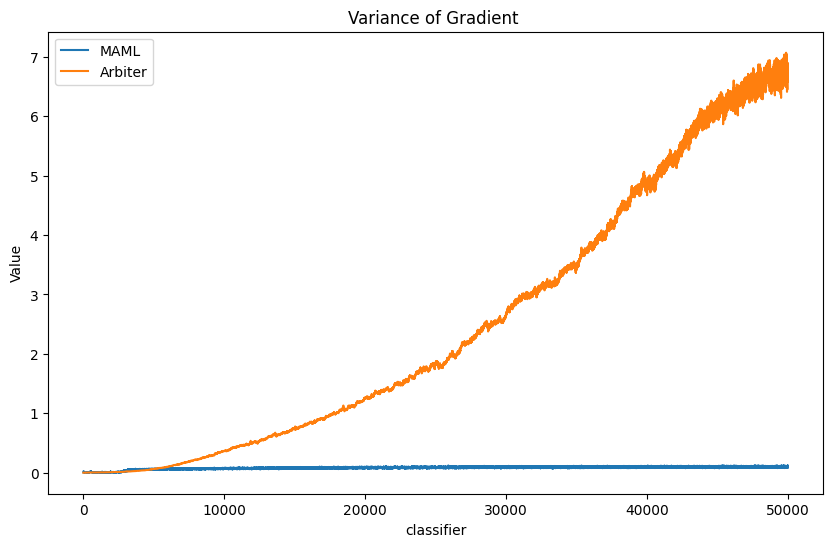

In [100]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_var'],label='Arbiter')

plt.xlabel('classifier')
plt.ylabel('Value')
plt.title('Variance of Gradient ')
plt.legend()

# 6. Weight L2 Norm

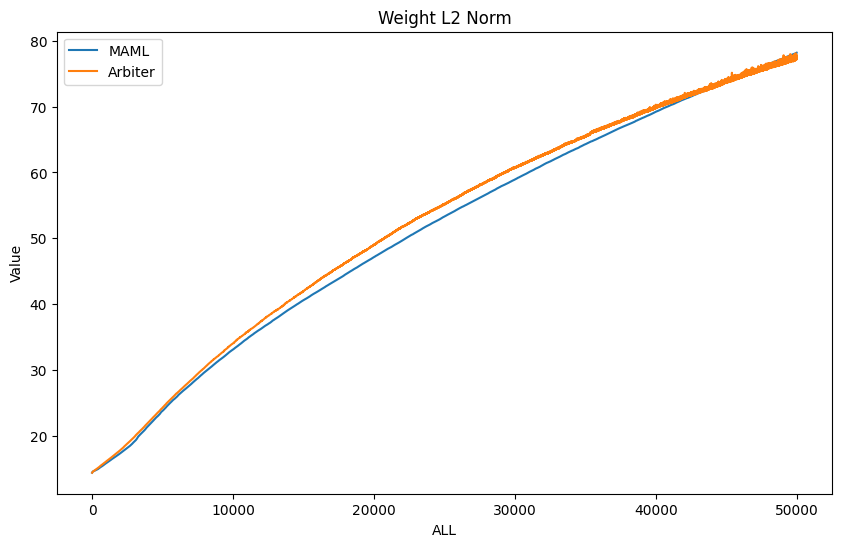

In [101]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_norm'], label='MAML')
plt.plot(arbiter_gr['all_weights_norm'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight L2 Norm')
plt.legend()

# 7. Weight Variance

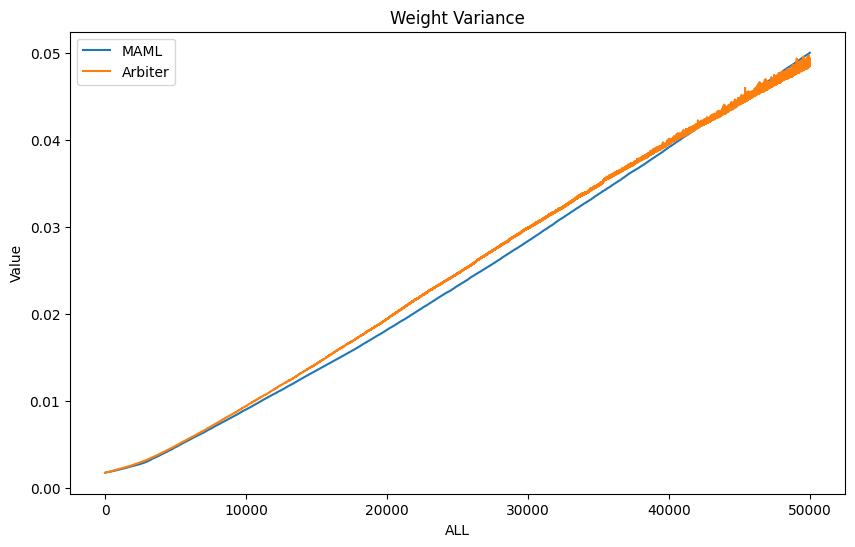

In [102]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_var'], label='MAML')
plt.plot(arbiter_gr['all_weights_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight Variance')
plt.legend()

# 8. Gradient Mean

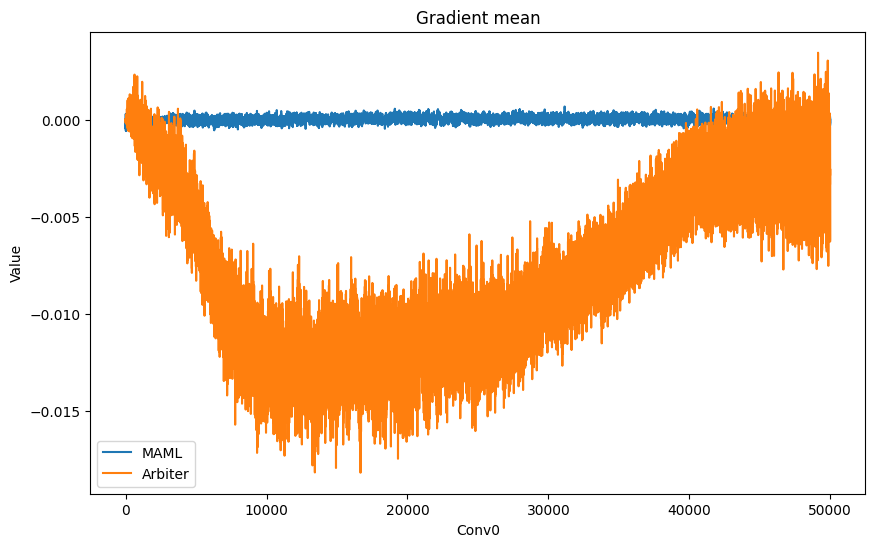

In [103]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_mean'], label='MAML')
plt.plot(arbiter_gr['all_grads_mean'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

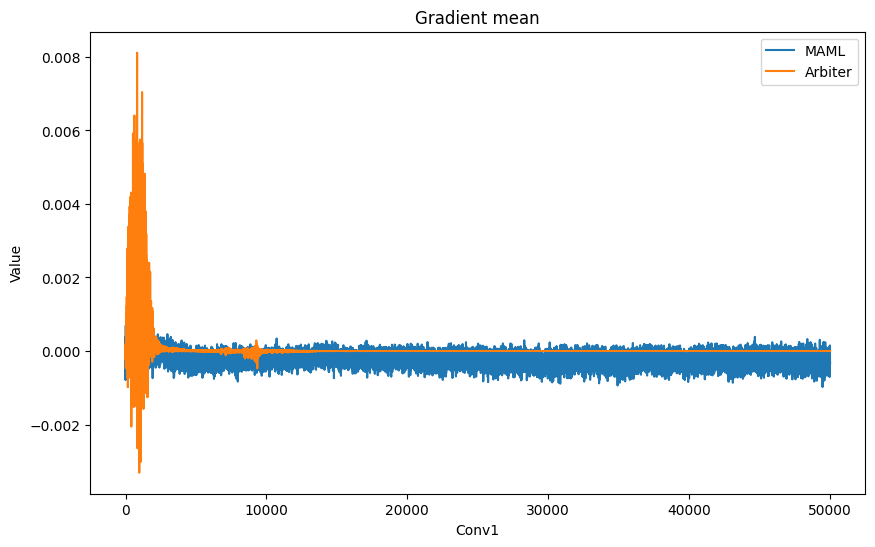

In [104]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

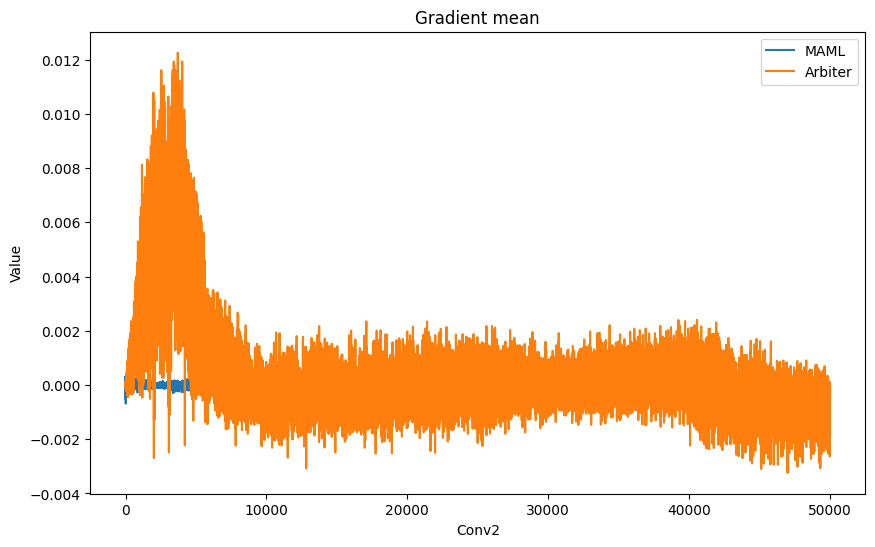

In [105]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

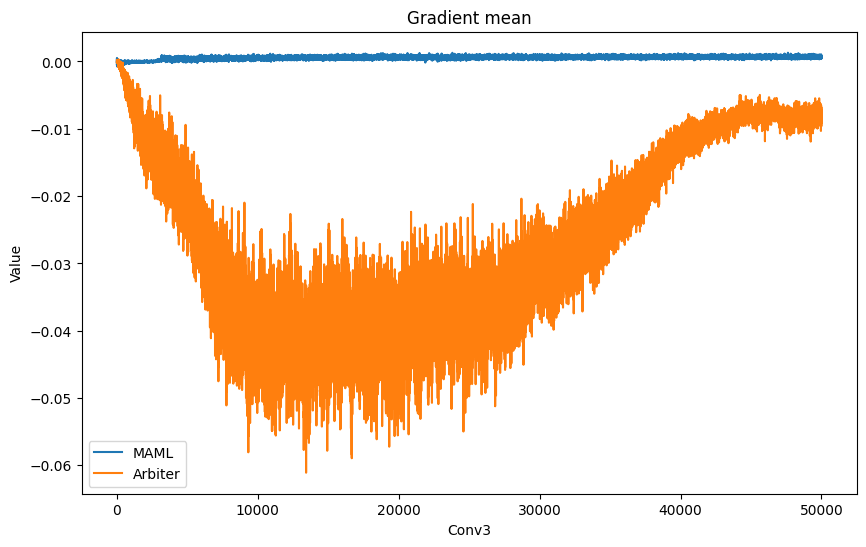

In [106]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

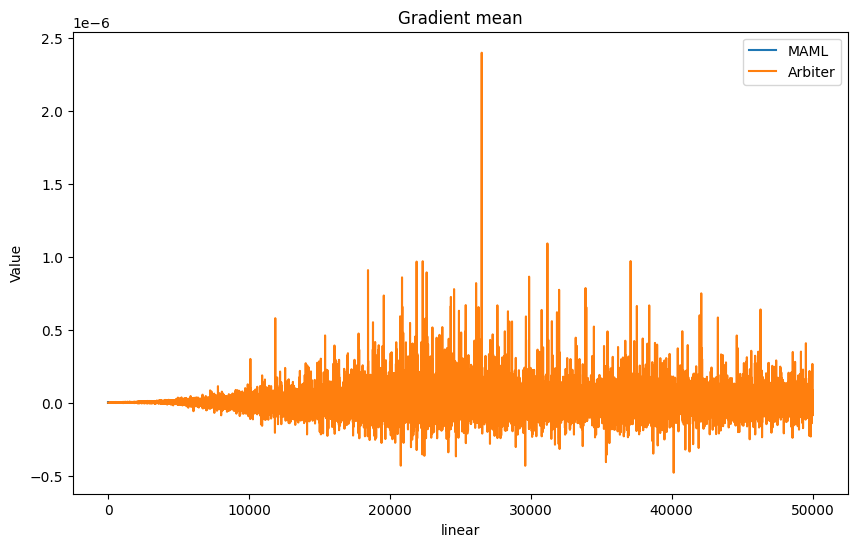

In [107]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_mean'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

# 9. GSNR

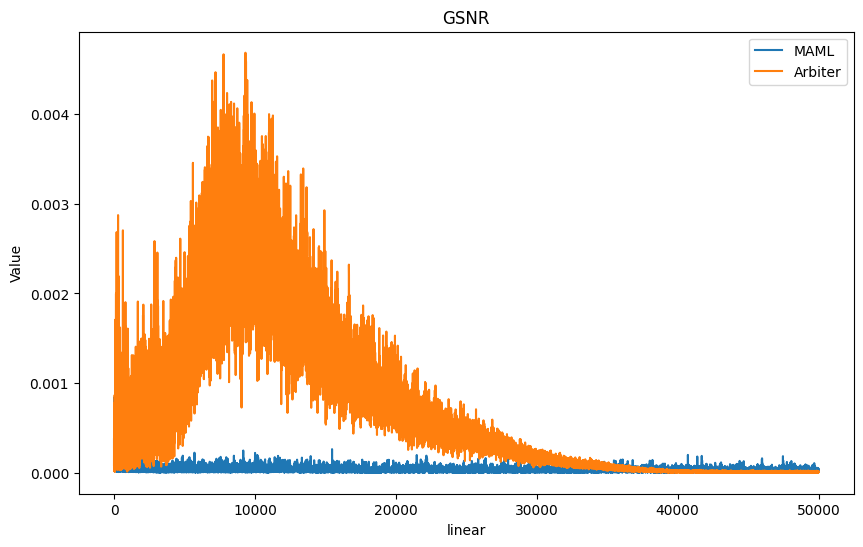

In [108]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['gsnr'], label='MAML')
plt.plot(arbiter_gr['gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

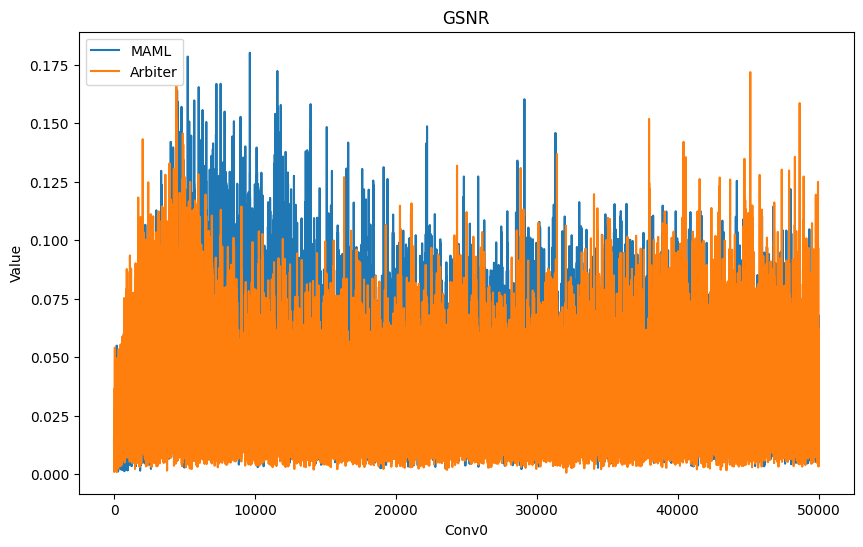

In [109]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

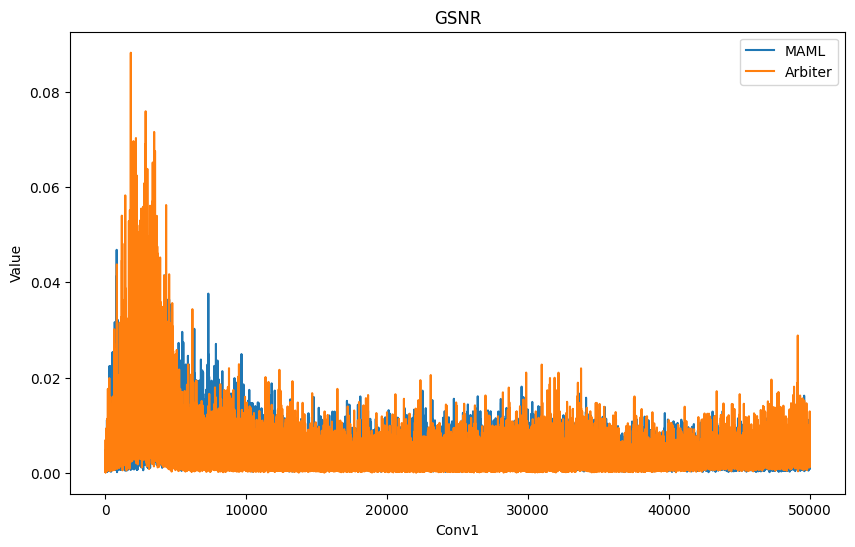

In [110]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

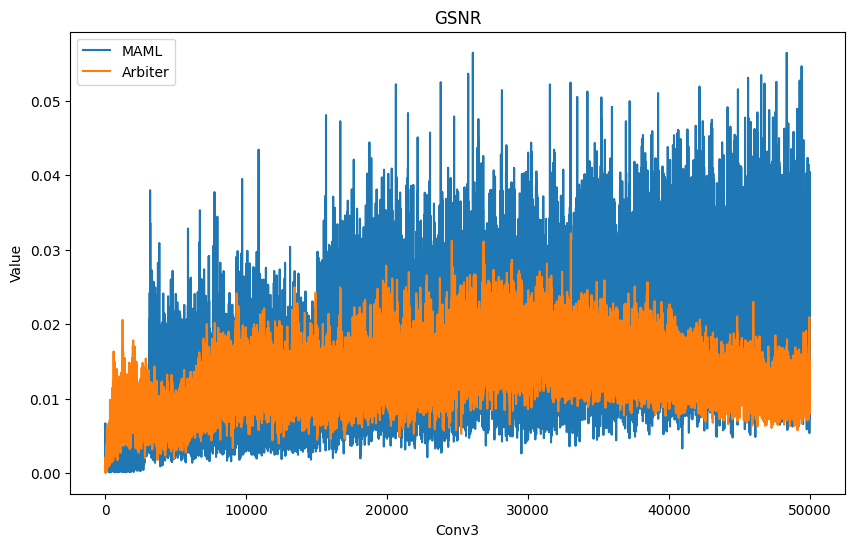

In [111]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_gsnr'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()

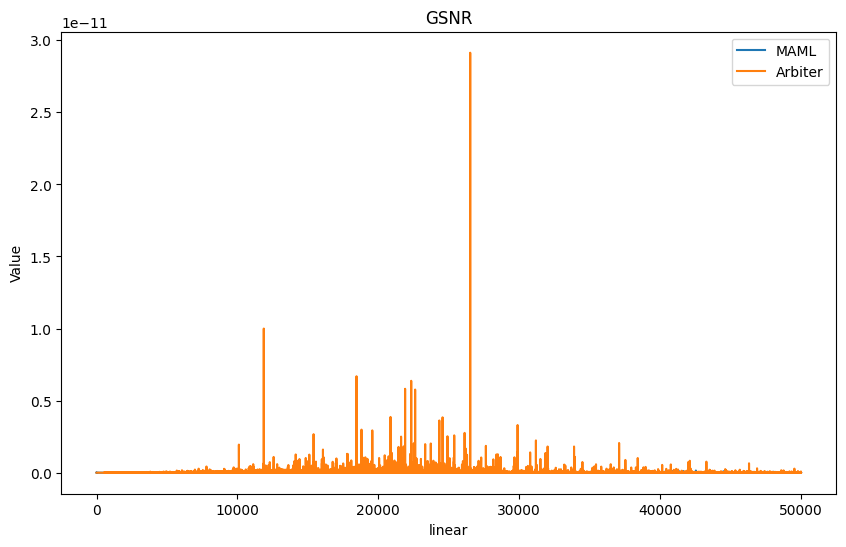

In [112]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_gsnr'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_gsnr'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('GSNR')
plt.legend()